<a href="https://colab.research.google.com/github/vigneshshiv28/DAV_60/blob/main/DAV_60_exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim:**Multiple Linear Regression in Python and R

**Lab Outcomes (LO)**:
Implement various Regression techniques for prediction. (LO2)

**Tools and Libraries**:Python Libraries: scikit-learn, matplotlib, numpy, pandas

R Libraries: lm, ggplot2, dplyr, broom, ggubr

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("/content/sample_data/2019.csv")
data.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
df = pd.DataFrame(data,columns= ["Score","GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"])
df.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
df.describe

<bound method NDFrame.describe of      Score  GDP per capita  Social support  Healthy life expectancy  \
0    7.769           1.340           1.587                    0.986   
1    7.600           1.383           1.573                    0.996   
2    7.554           1.488           1.582                    1.028   
3    7.494           1.380           1.624                    1.026   
4    7.488           1.396           1.522                    0.999   
..     ...             ...             ...                      ...   
151  3.334           0.359           0.711                    0.614   
152  3.231           0.476           0.885                    0.499   
153  3.203           0.350           0.517                    0.361   
154  3.083           0.026           0.000                    0.105   
155  2.853           0.306           0.575                    0.295   

     Freedom to make life choices  Generosity  Perceptions of corruption  
0                           0.596     

In [5]:
df.isnull().sum()

Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

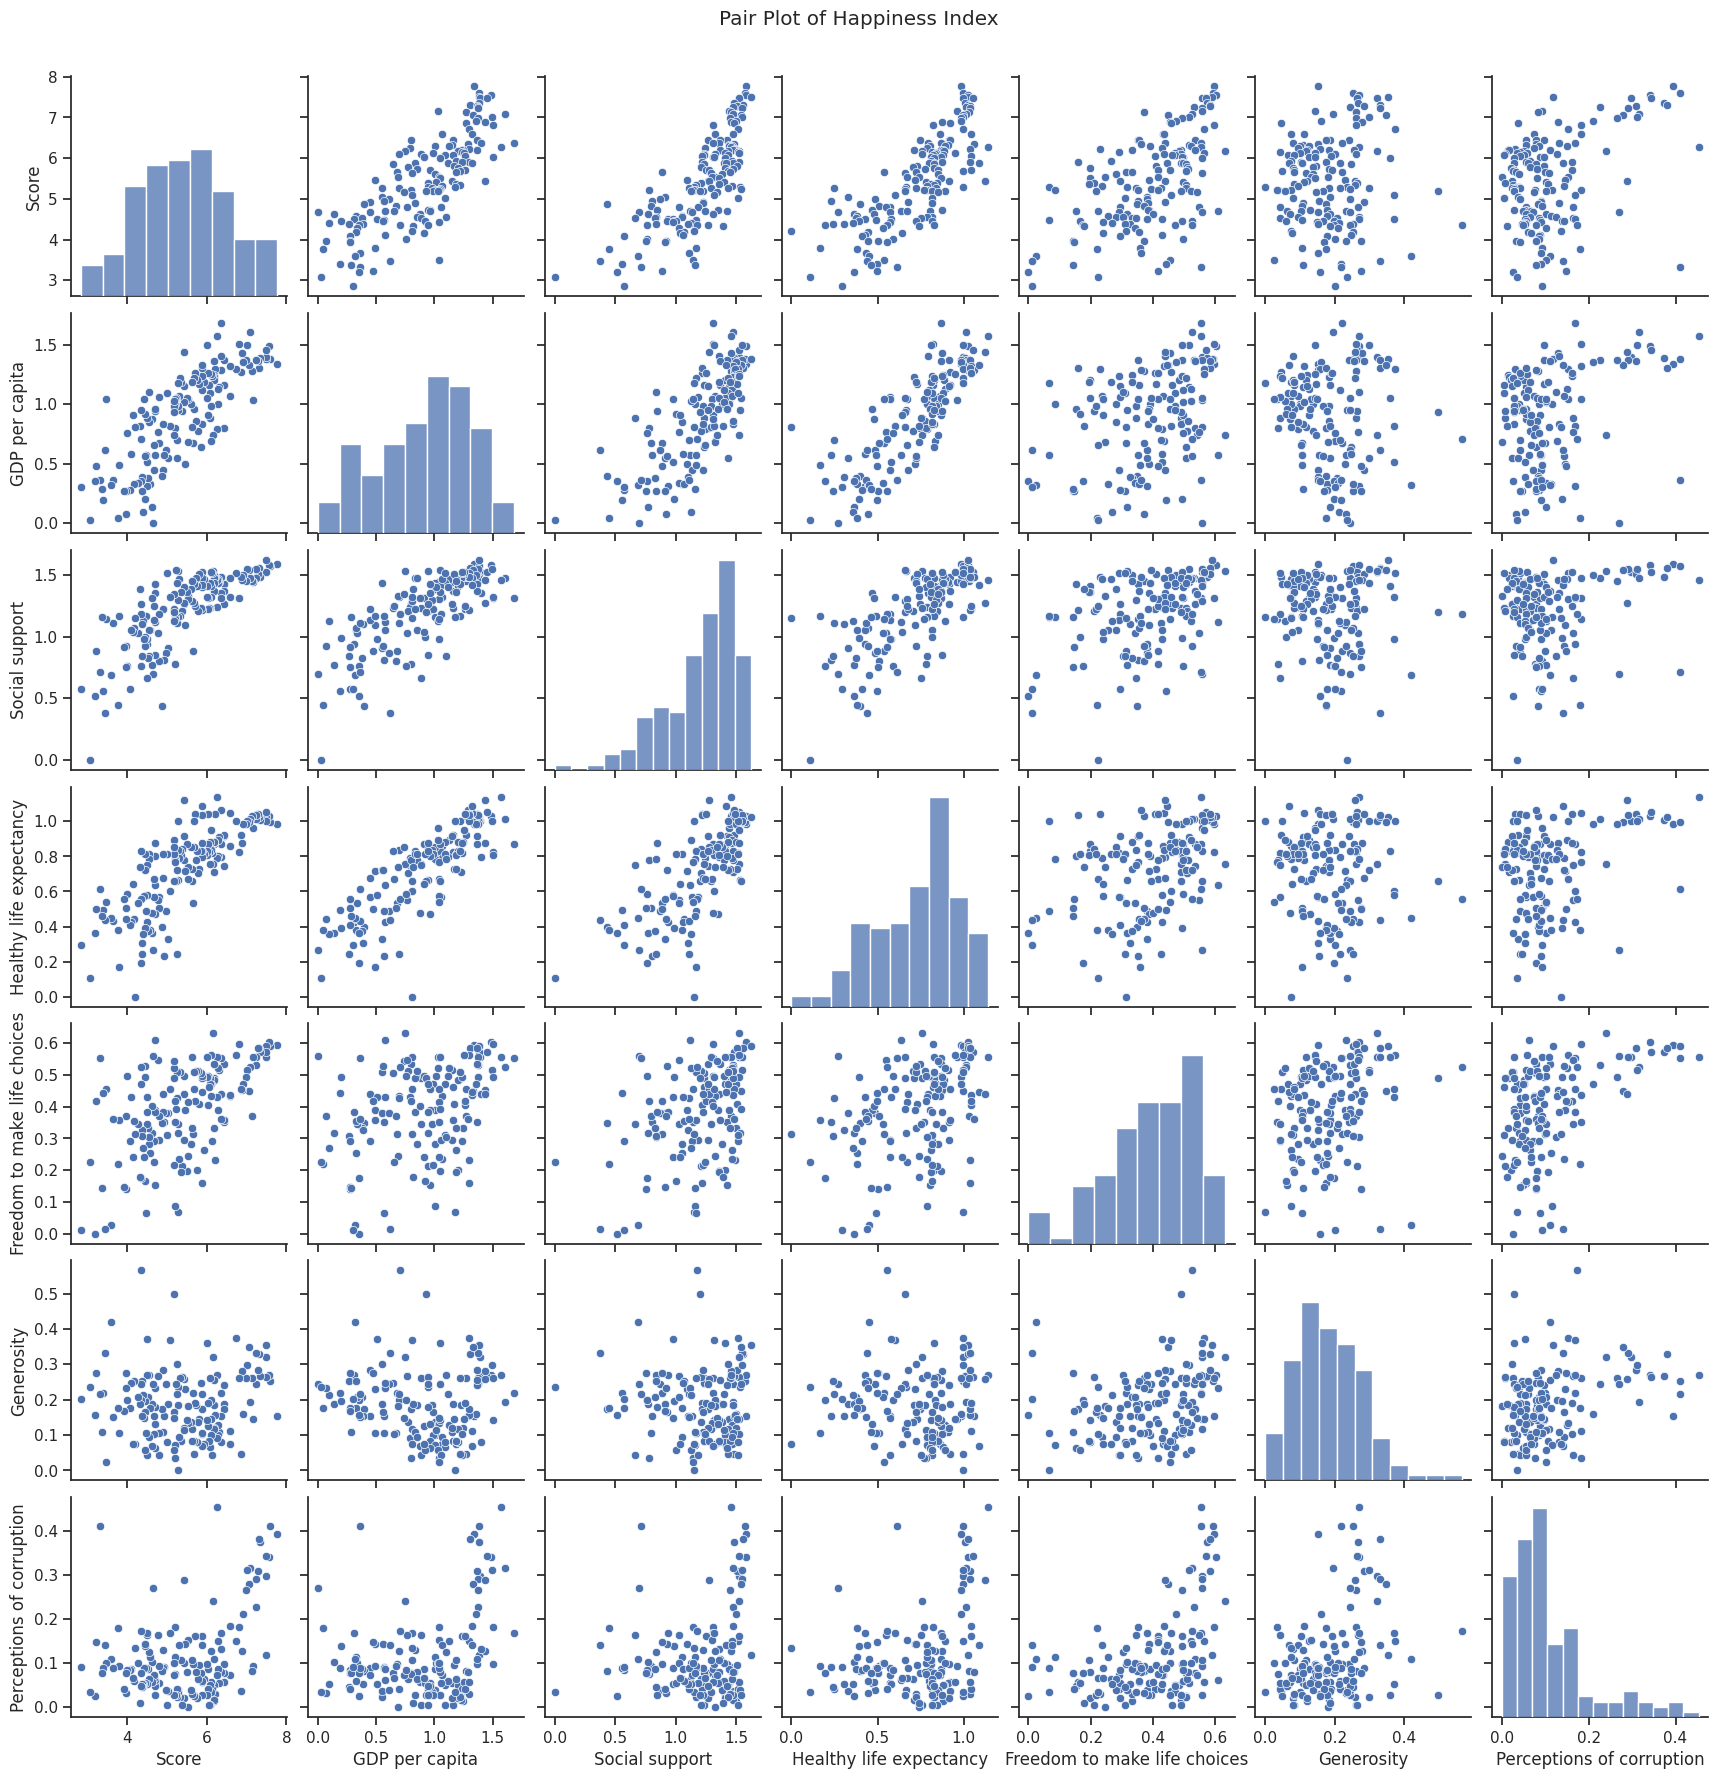

In [6]:
columns = ["Score","GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]
df1 = df[columns]

sns.set(style="ticks", color_codes=True)
pair_plot = sns.pairplot(df1)
plt.suptitle('Pair Plot of Happiness Index', y=1.02)
plt.show()

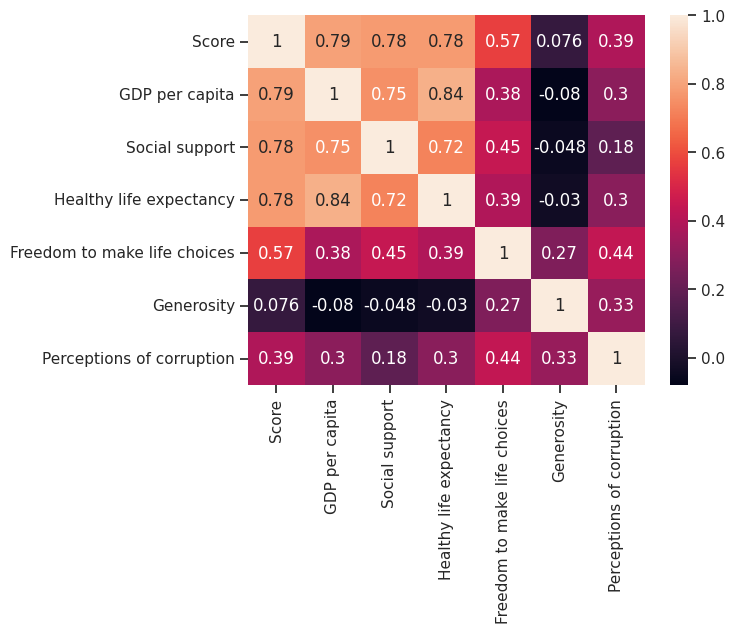

In [7]:
sns.heatmap(df.corr(),annot=True)
plt.show()

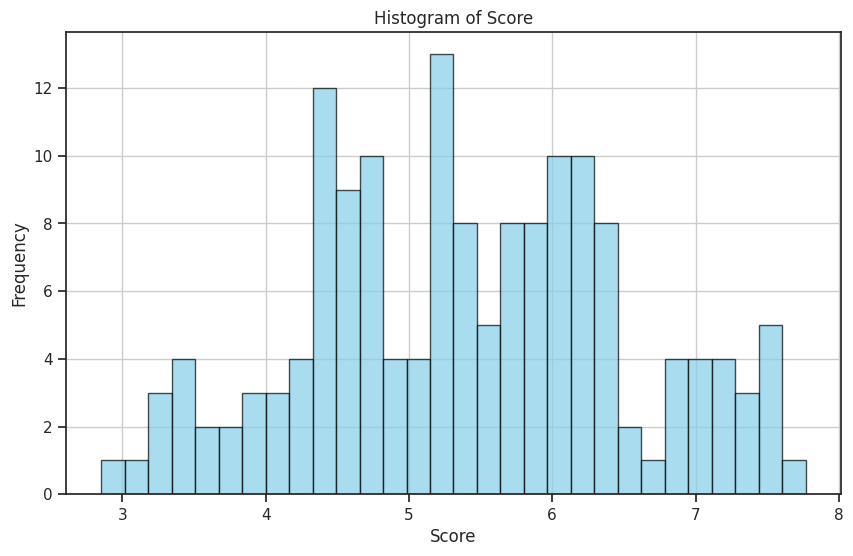

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['Score'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
mask_per_capita = (df["GDP per capita"] >= 1) & (df["GDP per capita"] <= 1.25)
mask_score = df["Score"] < 4


filtered_df = df[mask_per_capita & mask_score]


filtered_df

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
147,3.488,1.041,1.145,0.538,0.455,0.025,0.1


In [10]:
df.drop([147], axis=0, inplace=True)
print(147 in df.index)

False


In [11]:
x = df["Social support"].values.reshape(-1,1)
y = df["Score"].values.reshape(-1,1)

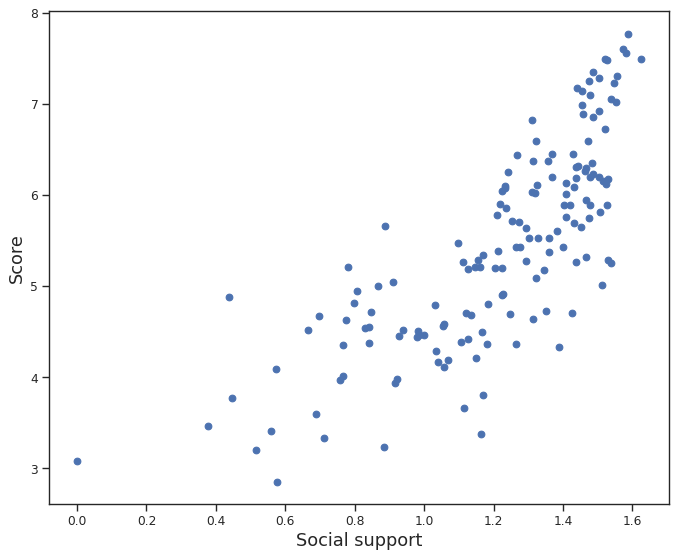

In [12]:
plt.figure(figsize=(10,8),dpi = 80)
plt.scatter(x,y)
plt.xlabel("Social support",size = 16)
plt.ylabel("Score",size = 16)
plt.show()

In [13]:
mask_per_capita = (df["Social support"] >= 0.0) & (df["Social support"] <= 0.1)
mask_score = df["Score"] > 3


filtered_df = df[mask_per_capita & mask_score]


filtered_df

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
154,3.083,0.026,0.0,0.105,0.225,0.235,0.035


In [14]:
df.drop([154], axis=0, inplace=True)
print(154 in df.index)

False


In [15]:
mask_per_capita = (df["Social support"] >= 0.4) & (df["Social support"] <= 0.5)
mask_score = (df["Score"] < 5) & (df["Score"] > 4)


filtered_df = df[mask_per_capita & mask_score]


filtered_df

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
101,4.883,0.393,0.437,0.397,0.349,0.175,0.082


In [16]:
df.drop([101], axis=0, inplace=True)
print(101 in df.index)

False


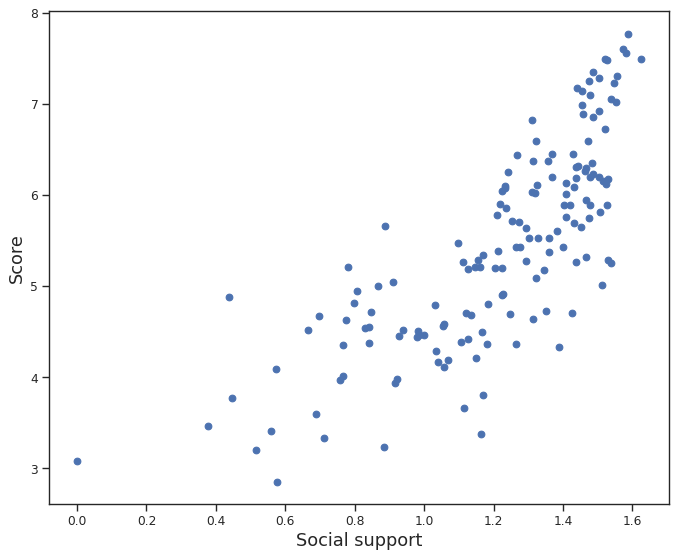

In [17]:
plt.figure(figsize=(10,8),dpi = 80)
plt.scatter(x,y)
plt.xlabel("Social support",size = 16)
plt.ylabel("Score",size = 16)
plt.show()

In [18]:
df

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
150,3.380,0.287,1.163,0.463,0.143,0.108,0.077
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025


In [19]:
x = df[["Social support","GDP per capita"]]
y = df["Score"]
print(x.shape)
print(y.shape)

(153, 2)
(153,)


In [20]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(114, 2)
(39, 2)
(114,)
(39,)


In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [22]:
y_predict = model.predict(x_test)
y_predict.shape

(39,)

In [23]:
r2 = model.score(x, y)
r2

0.7246280738177118

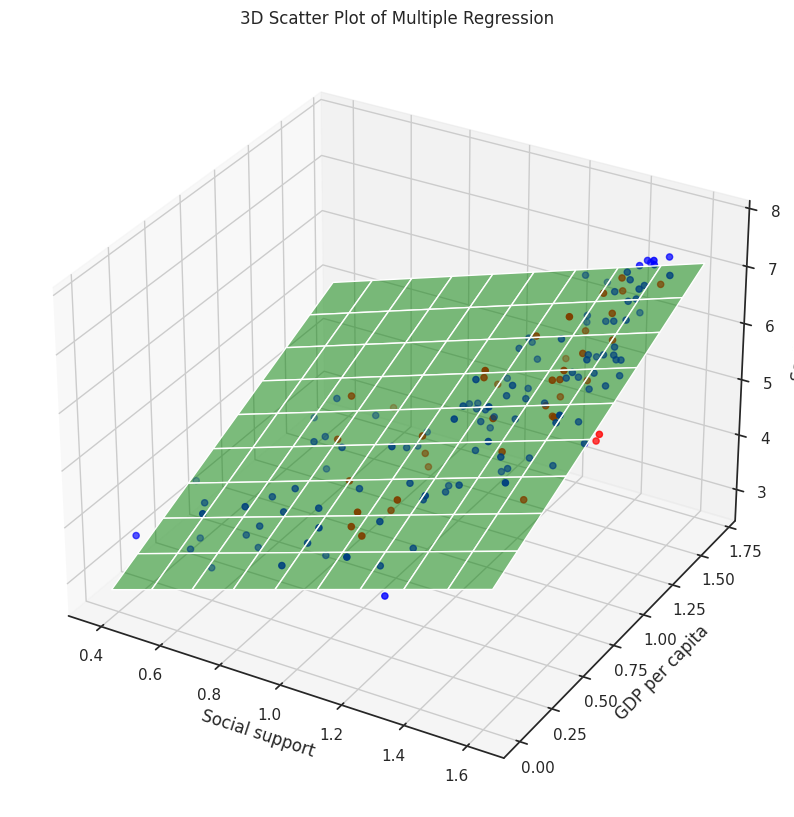

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_train["Social support"], x_train["GDP per capita"], y_train, color='blue', label='Training data')
ax.scatter(x_test["Social support"], x_test["GDP per capita"], y_test, color='red', label='Test data')

xx, yy = np.meshgrid(np.linspace(x_train["Social support"].min(), x_train["Social support"].max(), 10),
                     np.linspace(x_train["GDP per capita"].min(), x_train["GDP per capita"].max(), 10))
zz = model.intercept_ + model.coef_[0] * xx + model.coef_[1] * yy

ax.plot_surface(xx, yy, zz, alpha=0.5, color='green', label='Regression plane')

ax.set_xlabel('Social support')
ax.set_ylabel('GDP per capita')
ax.set_zlabel('Score')
ax.set_title('3D Scatter Plot of Multiple Regression')

plt.show()


In [25]:
from sklearn import metrics
print("Explaind variance:", metrics.explained_variance_score(y_test,y_predict))
print("Max error:",metrics.max_error(y_test,y_predict))
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_predict))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_predict,squared=True))
print("R-2 score:",metrics.r2_score(y_test,y_predict))

Explaind variance: 0.5581526281819531
Max error: 1.2662204117902744
Mean absolute error: 0.5022615395967776
Mean squared error: 0.38079186838661827
R-2 score: 0.5581407385239467


In [3]:
 install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [4]:
library(readr)
library(ggplot2)
library(dplyr)
library(caret)


Loading required package: lattice



In [5]:
data <- read.csv("/content/sample_data/2019.csv")
head(data)

,Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


In [6]:
df <- data[, c("Score", "GDP.per.capita", "Social.support", "Healthy.life.expectancy", "Freedom.to.make.life.choices", "Generosity", "Perceptions.of.corruption")]
summary(df)

     Score       GDP.per.capita   Social.support  Healthy.life.expectancy
 Min.   :2.853   Min.   :0.0000   Min.   :0.000   Min.   :0.0000         
 1st Qu.:4.545   1st Qu.:0.6028   1st Qu.:1.056   1st Qu.:0.5477         
 Median :5.380   Median :0.9600   Median :1.272   Median :0.7890         
 Mean   :5.407   Mean   :0.9051   Mean   :1.209   Mean   :0.7252         
 3rd Qu.:6.184   3rd Qu.:1.2325   3rd Qu.:1.452   3rd Qu.:0.8818         
 Max.   :7.769   Max.   :1.6840   Max.   :1.624   Max.   :1.1410         
 Freedom.to.make.life.choices   Generosity     Perceptions.of.corruption
 Min.   :0.0000               Min.   :0.0000   Min.   :0.0000           
 1st Qu.:0.3080               1st Qu.:0.1087   1st Qu.:0.0470           
 Median :0.4170               Median :0.1775   Median :0.0855           
 Mean   :0.3926               Mean   :0.1848   Mean   :0.1106           
 3rd Qu.:0.5072               3rd Qu.:0.2482   3rd Qu.:0.1412           
 Max.   :0.6310               Max.   :0.5660

In [7]:
colSums(is.na(df))

Score               GDP.per.capita 
                           0                            0 
              Social.support      Healthy.life.expectancy 
                           0                            0 
Freedom.to.make.life.choices                   Generosity 
                           0                            0 
   Perceptions.of.corruption 
                           0

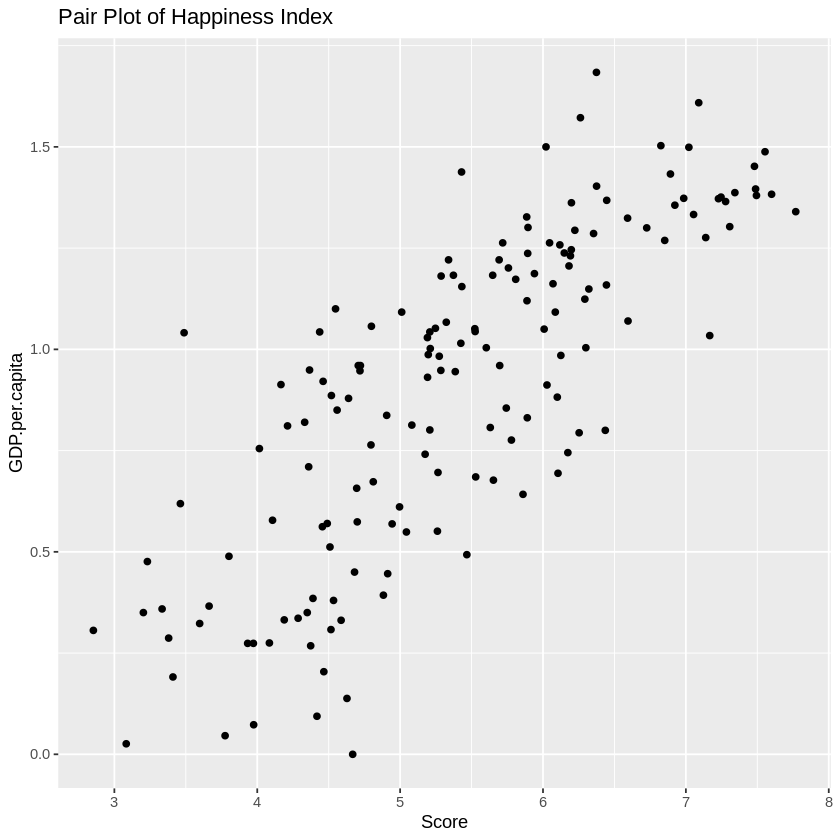

In [9]:
pair_plot <- ggplot(df, aes(x = Score, y = GDP.per.capita)) +
  geom_point() +
  labs(title = "Pair Plot of Happiness Index")
print(pair_plot)

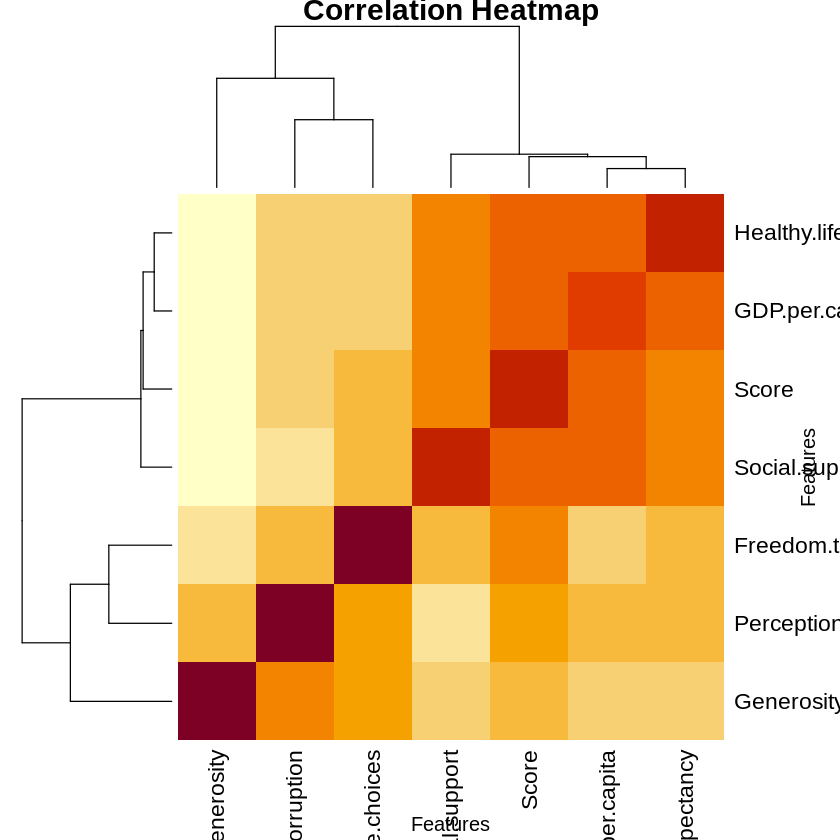

In [10]:
correlation_matrix <- cor(df)
heatmap(correlation_matrix,
        xlab = "Features", ylab = "Features",
        main = "Correlation Heatmap")

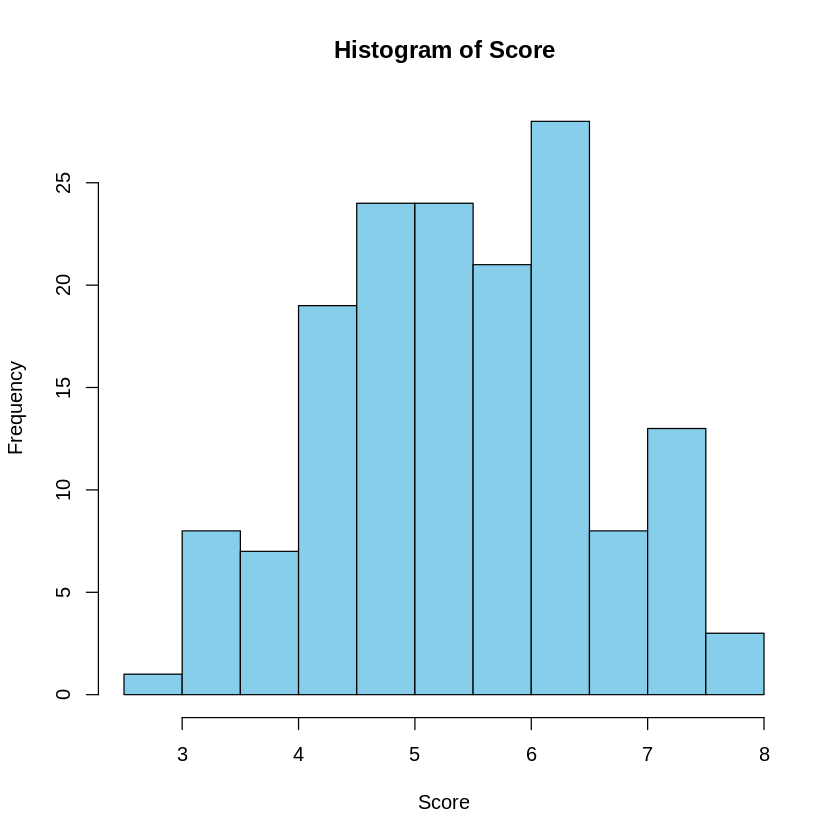

In [11]:
hist(df$Score, main = "Histogram of Score", xlab = "Score", col = "skyblue", border = "black")

In [12]:
filtered_df <- df[df$GDP.per.capita >= 1 & df$GDP.per.capita <= 1.25 & df$Score < 4, ]

In [13]:
df <- df[-147, ]
print(147 %in% rownames(df))

[1] FALSE


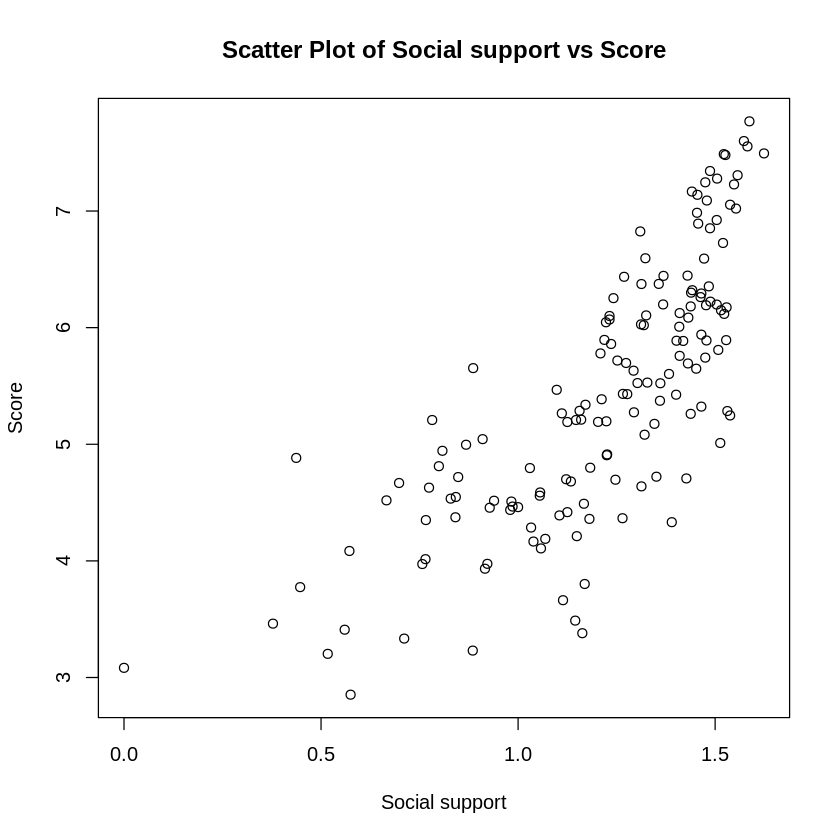

In [14]:
plot(df$Social.support, df$Score, xlab = "Social support", ylab = "Score", main = "Scatter Plot of Social support vs Score")

In [15]:
filtered_df <- df[df$Social.support >= 0.4 & df$Social.support <= 0.5 & df$Score < 5 & df$Score > 4, ]

In [16]:
df <- df[-154, ]
print(154 %in% rownames(df))

[1] TRUE


In [17]:
filtered_df <- df[df$Social.support >= 0.4 & df$Social.support <= 0.5 & df$Score < 5 & df$Score > 4, ]

In [18]:
df <- df[-101, ]
print(101 %in% rownames(df))

[1] FALSE


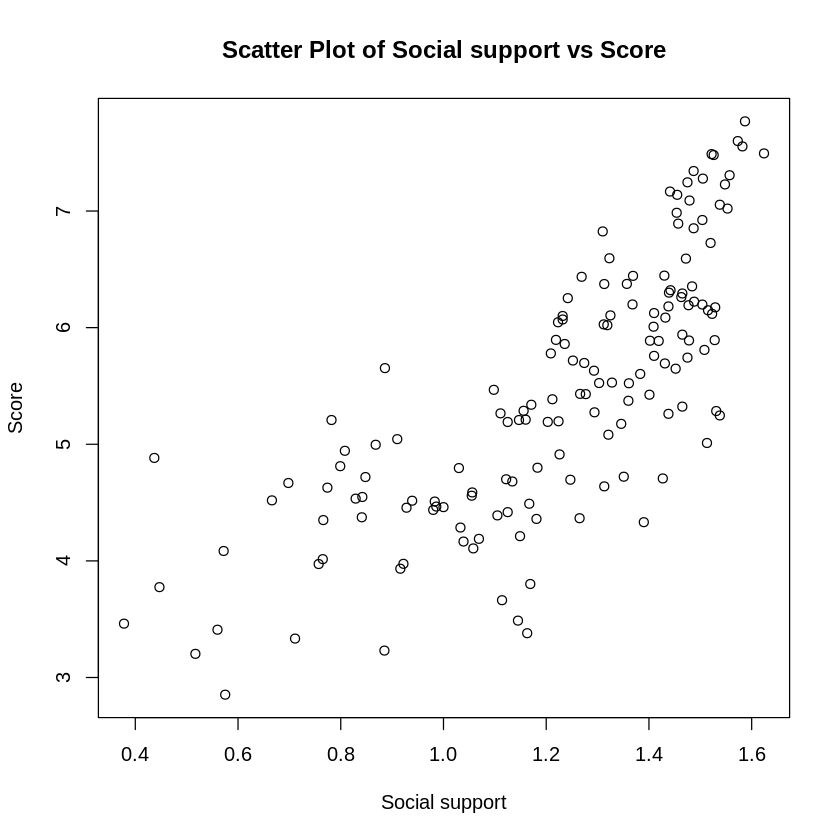

In [19]:
plot(df$Social.support, df$Score, xlab = "Social support", ylab = "Score", main = "Scatter Plot of Social support vs Score")

In [20]:
x <- df[, c("Social.support", "GDP.per.capita")]
y <- df$Score

In [21]:
set.seed(42)
train_index <- createDataPartition(y, p = 0.75, list = FALSE)
x_train <- x[train_index, ]
y_train <- y[train_index]
x_test <- x[-train_index, ]
y_test <- y[-train_index]


In [22]:
model <- lm(Score ~ ., data = df)
summary(model)



Call:
lm(formula = Score ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.73665 -0.33942  0.06057  0.35543  1.25558 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    1.7087     0.2222   7.691 1.98e-12 ***
GDP.per.capita                 0.7218     0.2206   3.272 0.001331 ** 
Social.support                 1.2243     0.2477   4.942 2.10e-06 ***
Healthy.life.expectancy        1.1205     0.3360   3.335 0.001081 ** 
Freedom.to.make.life.choices   1.4164     0.3876   3.654 0.000359 ***
Generosity                     0.4287     0.5159   0.831 0.407321    
Perceptions.of.corruption      1.0460     0.5445   1.921 0.056696 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5337 on 146 degrees of freedom
Multiple R-squared:  0.7727,	Adjusted R-squared:  0.7634 
F-statistic: 82.72 on 6 and 146 DF,  p-value: < 2.2e-16
